In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
n = pd.read_csv("nobel.csv",parse_dates=True)

In [3]:
n.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Count data

In [4]:
print(n['Sex'].value_counts().head(10))
sex=n['Sex'].value_counts()
##get the frequency counts

Male      893
Female     50
Name: Sex, dtype: int64


In [5]:
city=n['Birth City'].value_counts().head(10)
print(city)

New York, NY      48
Paris             25
London            21
Vienna            16
Chicago, IL       13
Berlin            11
Budapest           8
Boston, MA         8
Washington, DC     8
Munich             8
Name: Birth City, dtype: int64


In [6]:
c=n['Birth Country'].value_counts().head(15)
print(c)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Name: Birth Country, dtype: int64


### Slightly improved barplot

In [7]:
plt.rcParams['figure.figsize'] = [13, 7] #figure size

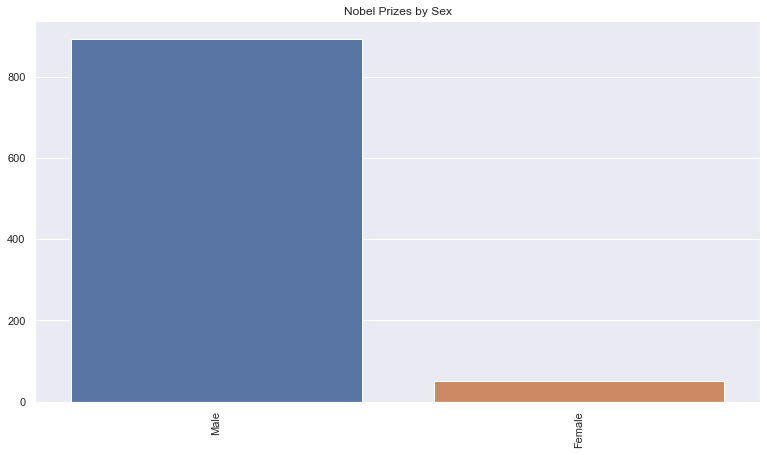

In [8]:
sns.barplot(x=sex.index,y=sex.values)
## x= male or female, y=values
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Sex')
plt.show()

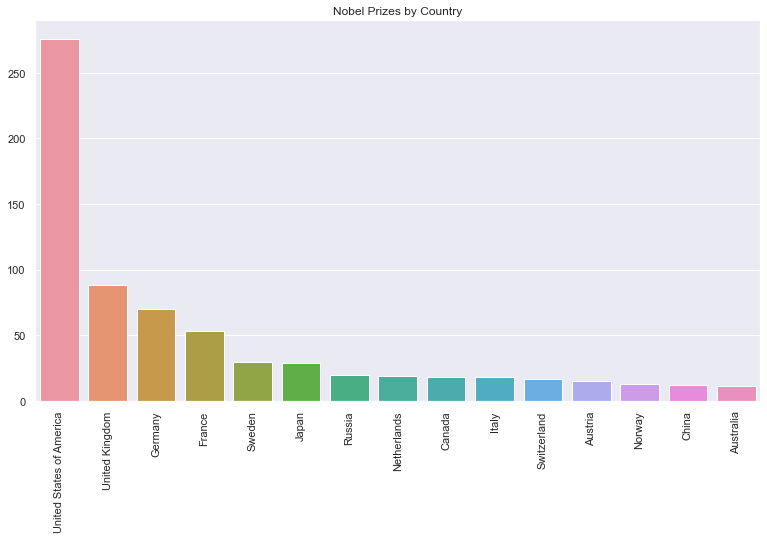

In [9]:
sns.barplot(x=c.index,y=c.values)
## x= male or female, y=values
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Country')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


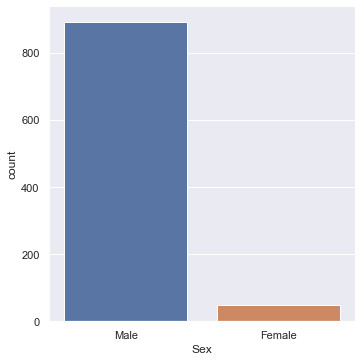

In [10]:
sns.factorplot('Sex',data=n,kind='count')

### Repeat winners

In [11]:
repeat=n.groupby(['Category','Full Name']).filter(lambda group : len(group)>=2)

In [12]:
n['Birth Year'] = n['Birth Date'].str[0:4]
n['Birth Year'] = n['Birth Year'].replace(to_replace="nan", value=0)
n['Birth Year'] = n['Birth Year'].apply(pd.to_numeric)

In [13]:
n['Age']=n['Year']- n['Birth Year'] ##age

In [14]:
n.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Birth Year,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1852.0,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1839.0,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1854.0,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1828.0,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1822.0,79.0


### Joinplot: histogram+scatter plot
#### histogram on the top shows the distribution of the variable at the x-axis and the histogram to the right shows the distribution of the variable at the y-axis.

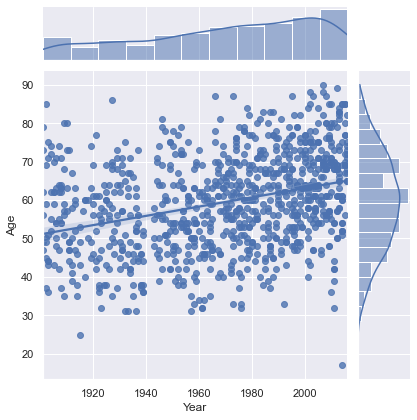

In [15]:
sns.jointplot(x="Year",
        y="Age",
        kind='reg',
        data=n)

plt.show()

### Relationship between the year and the age of nobel prize winner,

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


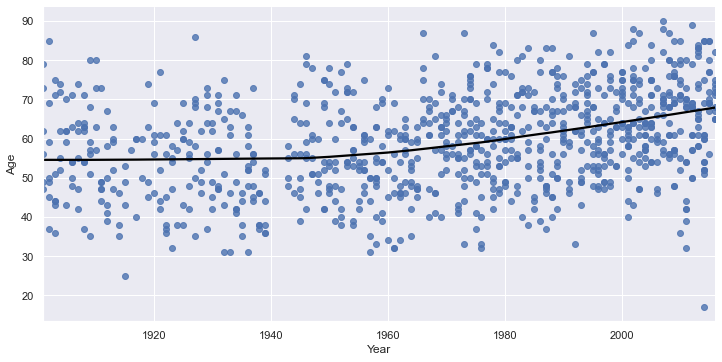

In [16]:
sns.lmplot('Year','Age',data=n,lowess=True, aspect=2,  
           line_kws={'color' : 'black'})

### OLS type line
### lowess: smooth fit 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


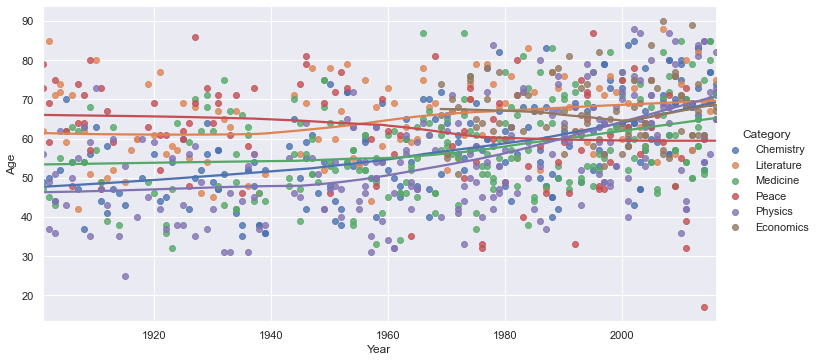

In [17]:
sns.lmplot('Year','Age',data=n,lowess=True, aspect=2, hue='Category')